Creating the Resting state eeg dataset
#alpha waves 8-12 Hz
#theta waves 4-8 HZ
#sampling frequency=256 Hz
Duration = 5 mins


Step 1: EEG CSV Generator in Python

In [3]:
import numpy as np
import pandas as pd

# Generate EEG dataset with exactly 2500 records
def generate_eeg_csv(file_name, fs=256, total_records=2500):
    """
    Generates an EEG CSV file with Theta and Alpha waves with exactly 2500 records.
    :param file_name: Name of the output CSV file.
    :param fs: Sampling frequency (default 256 Hz).
    :param total_records: Total number of records to generate (default 2500).
    """
    duration = total_records / fs  # Calculate the duration based on the number of records and sampling frequency
    time = np.linspace(0, duration, total_records)  # Time vector

    # Generate Theta waves (4-8 Hz)
    theta_freq = np.random.uniform(4, 8)  # Random frequency between 4 and 8 Hz
    theta_amplitude = np.random.uniform(0.3, 0.5)  # Random amplitude for theta
    theta_wave = theta_amplitude * np.sin(2 * np.pi * theta_freq * time)

    # Generate Alpha waves (8-12 Hz)
    alpha_freq = np.random.uniform(8, 12)  # Random frequency between 8 and 12 Hz
    alpha_amplitude = np.random.uniform(0.4, 0.6)  # Random amplitude for alpha
    alpha_wave = alpha_amplitude * np.sin(2 * np.pi * alpha_freq * time)

    # Combine Theta and Alpha waves
    eeg_signal = theta_wave + alpha_wave

    # Optional: Add random noise
    noise = 0.05 * np.random.randn(len(time))
    eeg_signal_noisy = eeg_signal + noise

    # Create a DataFrame
    df = pd.DataFrame({
        'Time': time,
        'Amplitude': eeg_signal_noisy,
        'Frequency': ['Theta' if i % 2 == 0 else 'Alpha' for i in range(len(time))]
    })

    # Save the CSV file
    df.to_csv(file_name, index=False)
    print(f"EEG CSV file '{file_name}' generated successfully with {total_records} records!")

# Generate the EEG CSV file with 2500 records
generate_eeg_csv("resting_state_eeg_2500.csv")

EEG CSV file 'resting_state_eeg_2500.csv' generated successfully with 2500 records!


Step 2: EEG Pattern Display in Python

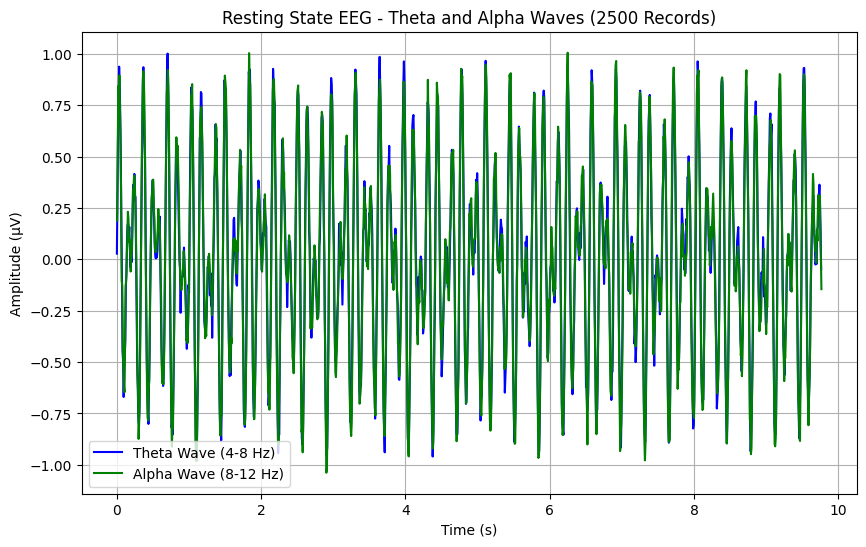

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load EEG CSV and plot data
def display_eeg_patterns(file_name):
    """
    Displays the EEG patterns using Matplotlib.
    :param file_name: Name of the input CSV file.
    """
    # Load the dataset
    df = pd.read_csv(file_name)

    # Separate data into Theta and Alpha patterns
    theta_data = df[df['Frequency'] == 'Theta']
    alpha_data = df[df['Frequency'] == 'Alpha']

    # Plot the Theta and Alpha waves
    plt.figure(figsize=(10, 6))

    # Plot Theta wave
    plt.plot(theta_data['Time'], theta_data['Amplitude'], label='Theta Wave (4-8 Hz)', color='blue')

    # Plot Alpha wave
    plt.plot(alpha_data['Time'], alpha_data['Amplitude'], label='Alpha Wave (8-12 Hz)', color='green')

    # Labels and legend
    plt.title('Resting State EEG - Theta and Alpha Waves (2500 Records)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


# Display the EEG patterns for the updated CSV file
display_eeg_patterns("resting_state_eeg_2500.csv")

Step 3: LDA Model

Classification Accuracy: 100.00%


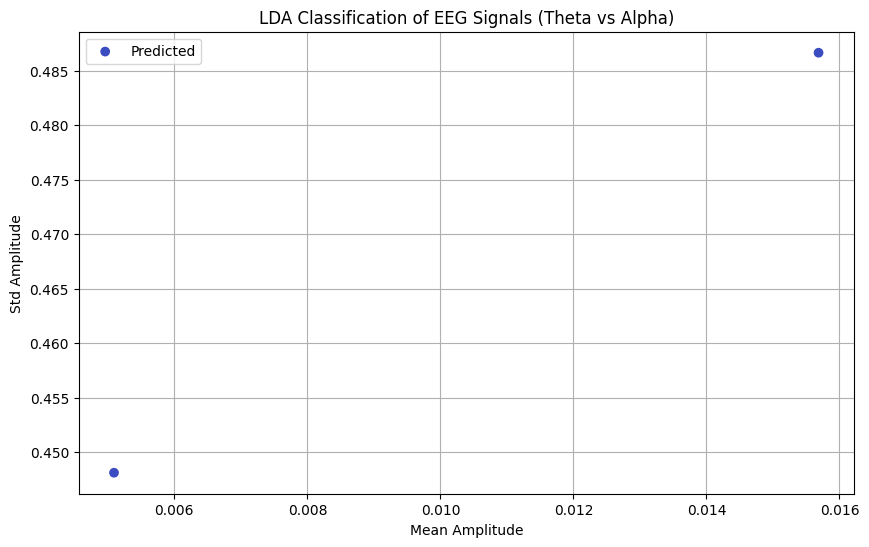

In [9]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the EEG dataset from CSV
def load_eeg_data(file_name):
    """
    Loads the EEG dataset from the CSV file.
    :param file_name: Path to the CSV file.
    :return: DataFrame containing EEG data.
    """
    df = pd.read_csv(file_name)
    return df

# Step 2: Extract features from the EEG data
def extract_features(df):
    """
    Extracts simple statistical features (mean amplitude, std amplitude) for LDA classification.
    :param df: DataFrame containing EEG data.
    :return: Feature DataFrame and labels.
    """
    features = []
    labels = []

    window_size = 256  # Define window size (1 second for fs=256Hz)
    for i in range(0, len(df), window_size):
        window = df.iloc[i:i + window_size]
        if len(window) == window_size:
            # Feature: Mean and Std of the amplitude in this window
            mean_amplitude = window['Amplitude'].mean()
            std_amplitude = window['Amplitude'].std()
            label = window['Frequency'].mode()[0]  # 'Theta' or 'Alpha'
            features.append([mean_amplitude, std_amplitude])
            labels.append(label)

    # Convert to DataFrame for modeling
    feature_df = pd.DataFrame(features, columns=['Mean_Amplitude', 'Std_Amplitude'])
    return feature_df, np.array(labels)

# Step 3: Train and simulate LDA model
def lda_classification(df):
    """
    Trains an LDA model on EEG data and simulates signal classification.
    :param df: DataFrame containing EEG data.
    """
    # Extract features and labels
    X, y = extract_features(df)
    
    # Convert labels to binary (0: Theta, 1: Alpha)
    y_binary = np.where(y == 'Theta', 0, 1)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

    # Train LDA model
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)

    # Simulate signal classification on test data
    y_pred = lda.predict(X_test)

    # Print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Classification Accuracy: {accuracy * 100:.2f}%")

    # Plot the actual vs predicted classification
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test['Mean_Amplitude'], X_test['Std_Amplitude'], c=y_pred, cmap='coolwarm', label='Predicted')
    plt.title('LDA Classification of EEG Signals (Theta vs Alpha)')
    plt.xlabel('Mean Amplitude')
    plt.ylabel('Std Amplitude')
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the LDA classification using the provided EEG CSV
eeg_data = load_eeg_data("resting_state_eeg_2500.csv")  # Load the resting state EEG dataset
lda_classification(eeg_data)  # Run the LDA classification

Real-Time Relaxation vs. Engagement Detection

In [10]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time

# Step 1: Load the EEG dataset from CSV
def load_eeg_data(file_name):
    """
    Loads the EEG dataset from the CSV file.
    :param file_name: Path to the CSV file.
    :return: DataFrame containing EEG data.
    """
    df = pd.read_csv(file_name)
    return df

# Step 2: Extract features from the EEG data (over time windows)
def extract_features(df, window_size=256):
    """
    Extracts simple statistical features (mean amplitude, std amplitude) for LDA classification.
    :param df: DataFrame containing EEG data.
    :param window_size: Number of samples in each window (256 = 1 second if fs=256Hz).
    :return: Feature DataFrame and labels.
    """
    features = []
    labels = []

    for i in range(0, len(df), window_size):
        window = df.iloc[i:i + window_size]
        if len(window) == window_size:
            # Feature: Mean and Std of the amplitude in this window
            mean_amplitude = window['Amplitude'].mean()
            std_amplitude = window['Amplitude'].std()
            label = window['Frequency'].mode()[0]  # 'Theta' or 'Alpha'
            features.append([mean_amplitude, std_amplitude])
            labels.append(label)

    # Convert to DataFrame for modeling
    feature_df = pd.DataFrame(features, columns=['Mean_Amplitude', 'Std_Amplitude'])
    return feature_df, np.array(labels)

# Step 3: Real-time simulation and feedback
def simulate_real_time_detection(df, lda_model, window_size=256):
    """
    Simulates real-time EEG signal classification and feedback based on LDA model.
    :param df: DataFrame containing EEG data.
    :param lda_model: Trained LDA model.
    :param window_size: Number of samples in each window (256 samples = 1 second).
    """
    for i in range(0, len(df), window_size):
        window = df.iloc[i:i + window_size]
        if len(window) == window_size:
            # Extract features for this window
            mean_amplitude = window['Amplitude'].mean()
            std_amplitude = window['Amplitude'].std()
            features = pd.DataFrame([[mean_amplitude, std_amplitude]], columns=['Mean_Amplitude', 'Std_Amplitude'])

            # Predict the mental state using the LDA model
            prediction = lda_model.predict(features)

            # Feedback based on prediction (0 = Theta, 1 = Alpha)
            if prediction[0] == 0:
                print("Patient is Relaxed (Theta wave dominant).")
            else:
                print("Patient is Engaged (Alpha wave dominant).")

            # Simulate real-time delay (e.g., 1 second)
            time.sleep(1)

# Step 4: Train and run LDA model with real-time detection
def lda_real_time_classification(df):
    """
    Trains an LDA model on EEG data and simulates real-time signal classification.
    :param df: DataFrame containing EEG data.
    """
    # Extract features and labels
    X, y = extract_features(df)

    # Convert labels to binary (0: Theta, 1: Alpha)
    y_binary = np.where(y == 'Theta', 0, 1)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

    # Train LDA model
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)

    # Simulate real-time signal acquisition and detection
    simulate_real_time_detection(df, lda)

# Step 5: Run the entire process using the provided EEG CSV
eeg_data = load_eeg_data("resting_state_eeg_2500.csv")  # Load the resting state EEG dataset
lda_real_time_classification(eeg_data)  # Train LDA and simulate real-time detection


Patient is Engaged (Alpha wave dominant).
Patient is Engaged (Alpha wave dominant).
Patient is Engaged (Alpha wave dominant).
Patient is Engaged (Alpha wave dominant).
Patient is Engaged (Alpha wave dominant).
Patient is Engaged (Alpha wave dominant).
Patient is Engaged (Alpha wave dominant).
Patient is Engaged (Alpha wave dominant).
Patient is Engaged (Alpha wave dominant).


Training the AI model to detect the functionality

In [47]:
import pandas as pd
import numpy as np
import random
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import time

# Step 1: Load the EEG dataset from CSV
def load_eeg_data(file_name):
    """Loads the EEG dataset from the CSV file."""
    df = pd.read_csv(file_name)
    # Check the unique labels in the dataset
    print("Unique labels in dataset:", df['Frequency'].unique())  # Replace 'Frequency' with the actual label column name
    return df

# Step 2: Extract features from the EEG data (over time windows)
def extract_features(df, window_size=256):
    """Extracts statistical features for LDA classification and checks label distribution within windows."""
    features = []
    labels = []
    theta_count_total = 0
    alpha_count_total = 0

    for i in range(0, len(df), window_size):
        window = df.iloc[i:i + window_size]

        if len(window) == window_size:
            mean_amplitude = window['Amplitude'].mean()
            std_amplitude = window['Amplitude'].std()

            # Count the occurrences of Theta and Alpha in the window
            theta_count = (window['Frequency'] == 'Theta').sum()
            alpha_count = (window['Frequency'] == 'Alpha').sum()

            theta_count_total += theta_count
            alpha_count_total += alpha_count

            # Print the distribution in this window
            print(f"Window {i//window_size}: Theta count = {theta_count}, Alpha count = {alpha_count}")

            # Assign the label based on the majority class in the window
            if theta_count > alpha_count:
                label = 'Theta'
            elif alpha_count > theta_count:
                label = 'Alpha'
            else:
                # Randomly assign 'Theta' or 'Alpha' in case of a tie
                label = random.choice(['Theta', 'Alpha'])
                print(f"Tie in window {i//window_size}, randomly assigning label: {label}")

            features.append([mean_amplitude, std_amplitude])
            labels.append(label)

    # Print the total distribution
    print(f"Total Theta count = {theta_count_total}, Total Alpha count = {alpha_count_total}")
    print(f"Final Label Distribution: {np.unique(labels, return_counts=True)}")

    return pd.DataFrame(features, columns=['Mean_Amplitude', 'Std_Amplitude']), np.array(labels)

# Step 3: Train and evaluate model
def train_model(df):
    """Trains an LDA model on EEG data and evaluates its performance."""
    X, y = extract_features(df)

    # Convert labels to binary (0: Theta, 1: Alpha)
    y_binary = np.where(y == 'Theta', 0, 1)

    # Check class distribution before SMOTE
    unique_classes, counts = np.unique(y_binary, return_counts=True)
    print("Class distribution before SMOTE:", dict(zip(unique_classes, counts)))

    # Check if both classes are present
    if len(unique_classes) < 2:
        print("Insufficient classes for SMOTE. Only found:", unique_classes)
        return None  # or handle as needed

    # Balance the dataset using SMOTE
    # Balance the dataset using SMOTE with adjusted k_neighbors
    smote = SMOTE(random_state=42, k_neighbors=2)  # Reduce k_neighbors to 2
    X_resampled, y_resampled = smote.fit_resample(X, y_binary)

    # Check the new class distribution after SMOTE
    unique_classes, counts = np.unique(y_resampled, return_counts=True)
    print("New Class distribution after SMOTE:", dict(zip(unique_classes, counts)))

    # Split the resampled data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Train LDA model
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = lda.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Classification Accuracy (LDA): {accuracy * 100:.2f}%")

    # Ensure both classes are present for classification report
    print("Classification Report (LDA):")
    print(classification_report(y_test, y_pred, target_names=['Theta', 'Alpha'], labels=[0, 1], zero_division=0))

    return lda  # Return the trained model for real-time detection

# Step 4: Simulate real-time detection
def simulate_real_time_detection(df, lda_model, window_size=256):
    """Simulates real-time EEG signal classification based on LDA model."""
    for i in range(0, len(df), window_size):
        window = df.iloc[i:i + window_size]
        if len(window) == window_size:
            mean_amplitude = window['Amplitude'].mean()
            std_amplitude = window['Amplitude'].std()
            features = pd.DataFrame([[mean_amplitude, std_amplitude]], columns=['Mean_Amplitude', 'Std_Amplitude'])

            # Predict the mental state using the LDA model
            prediction = lda_model.predict(features)

            # Feedback based on prediction (0 = Theta, 1 = Alpha)
            if prediction[0] == 0:
                print("Patient is Relaxed (Theta wave dominant).")
            else:
                print("Patient is Engaged (Alpha wave dominant).")

            # Simulate real-time delay (e.g., 1 second)
            time.sleep(1)

# Step 5: Run the entire process using the provided EEG CSV
eeg_data = load_eeg_data("resting_state_eeg_2500.csv")  # Load the resting state EEG dataset
trained_model = train_model(eeg_data)  # Train model and evaluate

if trained_model is not None:  # Check if the model was trained successfully
    simulate_real_time_detection(eeg_data, trained_model)  # Simulate real-time detection
else:
    print("Model training failed due to insufficient class diversity.")


Unique labels in dataset: ['Theta' 'Alpha']
Window 0: Theta count = 128, Alpha count = 128
Tie in window 0, randomly assigning label: Alpha
Window 1: Theta count = 128, Alpha count = 128
Tie in window 1, randomly assigning label: Theta
Window 2: Theta count = 128, Alpha count = 128
Tie in window 2, randomly assigning label: Alpha
Window 3: Theta count = 128, Alpha count = 128
Tie in window 3, randomly assigning label: Theta
Window 4: Theta count = 128, Alpha count = 128
Tie in window 4, randomly assigning label: Theta
Window 5: Theta count = 128, Alpha count = 128
Tie in window 5, randomly assigning label: Theta
Window 6: Theta count = 128, Alpha count = 128
Tie in window 6, randomly assigning label: Theta
Window 7: Theta count = 128, Alpha count = 128
Tie in window 7, randomly assigning label: Alpha
Window 8: Theta count = 128, Alpha count = 128
Tie in window 8, randomly assigning label: Alpha
Total Theta count = 1152, Total Alpha count = 1152
Final Label Distribution: (array(['Alpha'